<a href="https://colab.research.google.com/github/DipBobDar/DipBobDar/blob/main/Distance%26Angle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing python packages

In [1]:
!pip install numpy
!pip install MDAnalysis
import numpy as np
import MDAnalysis as mda

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 20.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 39.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.1/44.1 kB 5.4 MB/s eta 0:00:00


In [22]:
import pandas as pd
import matplotlib.pyplot as plt

Load the trajectory of the files

In [48]:
u3 = mda.Universe("3uMD2.gro", "3uMD3_noPBC.xtc")
u1 = mda.Universe("3uMD2.gro", "3uMD1_noPBC.xtc")
u2 = mda.Universe("3uMD2.gro", "3uMD2_noPBC.xtc")

/usr/local/lib/python3.10/dist-packages/MDAnalysis/coordinates/XDR.py:240: UserWarning: Reload offsets from trajectory
 ctime or size or n_atoms did not match
  warnings.warn("Reload offsets from trajectory\n "


Define the  atom selections for the benzene ring in Phe19, Phe 20, Tyr10 and Phe4 and the H atom in N-H bond of Gly22/Glu22


In [49]:
# the following label is used to select the benzene ring in VMD too -> resid 20 and (name CE1 or name CE2 or name CZ or name CD1 or name CD2 or name CG)
benzene_atoms20 = u1.select_atoms("(resid 20 and (name CE1 or name CE2 or name CZ or name CD1 or name CD2 or name CG))")
benzene_atoms19 = u1.select_atoms("(resid 19 and (name CE1 or name CE2 or name CZ or name CD1 or name CD2 or name CG))")
benzene_atoms10 = u1.select_atoms("(resid 10 and (name CE1 or name CE2 or name CZ or name CD1 or name CD2 or name CG))")
benzene_atoms04 = u1.select_atoms("(resid 4 and (name CE1 or name CE2 or name CZ or name CD1 or name CD2 or name CG))")
H_atom= u1.select_atoms("(resid 22 and name H)")

In [50]:
angles = []
dist = []
output = {}

Loop through each frame and get the coordinates for each of them, calculate the coordinates for the centroid of the ary interaction and find the distance and angle for each of the centroid and H-N of residue 22

In [51]:
rows = []
rows_Res20 = []
hist20 ={'3':0 , '3.5':0 , '4':0 ,'4.5':0 , '5':0 ,'5.5':0 , '6':0 }
#print(hist20)

for ts in u1.trajectory:
  i=1
  b20=benzene_atoms20.positions
  b19=benzene_atoms19.positions
  b10=benzene_atoms10.positions
  b04=benzene_atoms04.positions
  h22=H_atom.positions
  # Calculate the centroid of the benzene ring
  c20 = np.mean(b20, axis=0)
  c19 = np.mean(b19, axis=0)
  c10 = np.mean(b10, axis=0)
  c04 = np.mean(b04, axis=0)
  #calculate the vector
  v20_h=h22-c20
  v19_h=h22-c19
  v10_h=h22-c10
  v04_h=h22-c04
  # Calculate the distance between the centroid and the H atom
  dist20 = np.linalg.norm(v20_h)
  dist19 = np.linalg.norm(v19_h)
  dist10 = np.linalg.norm(v10_h)
  dist04 = np.linalg.norm(v04_h)
  # Calculate the angle between the vector from centroid to H atom and a reference vector (e.g., [1,0,0])
  reference_vector = np.array([1, 0, 0])
  dot_product20 = np.dot(v20_h, reference_vector)
  dot_product19 = np.dot(v19_h, reference_vector)
  dot_product10 = np.dot(v10_h, reference_vector)
  dot_product04 = np.dot(v04_h, reference_vector)
  magnitude_product20 = np.linalg.norm(v20_h) * np.linalg.norm(reference_vector)
  magnitude_product19 = np.linalg.norm(v19_h) * np.linalg.norm(reference_vector)
  magnitude_product10 = np.linalg.norm(v10_h) * np.linalg.norm(reference_vector)
  magnitude_product04 = np.linalg.norm(v04_h) * np.linalg.norm(reference_vector)
  angle_rad20 = np.arccos(dot_product20 / magnitude_product20)
  angle_rad19 = np.arccos(dot_product19 / magnitude_product19)
  angle_rad10 = np.arccos(dot_product10 / magnitude_product10)
  angle_rad04 = np.arccos(dot_product04 / magnitude_product04)
  angle_deg20 = np.degrees(angle_rad20)
  angle_deg19 = np.degrees(angle_rad19)
  angle_deg10 = np.degrees(angle_rad10)
  angle_deg04 = np.degrees(angle_rad04)
  Res20=[dist20, angle_deg20]
  Res19=[dist19, angle_deg19]
  Res10=[dist10, angle_deg10]
  Res04=[dist04, angle_deg04]
  #print(Res20)

  rows.append({#
    'Residue_20_dist': dist20,
    'Residue_20_angle': angle_deg20[0],
    'Residue_19_dist': dist19,
    'Residue_19_angle': angle_deg19[0],
                'Residue_10_dist': dist10,
    'Residue_10_angle': angle_deg10[0],
                'Residue_04_dist': dist04,
    'Residue_04_angle': angle_deg04[0],
  })

  if dist20 <=6 and angle_deg20[0] >=20 and angle_deg20 <=120:
    rows_Res20.append({
        'Residue_20_dist': dist20,
        'Residue_20_angle': angle_deg20[0]
        })
    if dist20 <= 3:
      temp = hist20['3']
      hist20['3'] = temp + 1
      temp = 0
      #print(hist20)
    elif dist20 > 3 and dist20 <=3.5 :
      temp = hist20['3.5']
      hist20['3.5'] = temp + 1
      temp = 0
    elif dist20 > 3.5 and dist20 <=4 :
      temp = hist20['4']
      hist20['4'] = temp + 1
      temp = 0
    elif dist20 > 4 and dist20 <=4.5 :
      temp = hist20['4.5']
      hist20['4.5'] = temp + 1
      temp = 0
    elif dist20 > 4.5 and dist20 <=5 :
      temp = hist20['5']
      hist20['5'] = temp + 1
      temp = 0
    elif dist20 > 5 and dist20 <=5.5 :
      temp = hist20['5.5']
      hist20['5.5'] = temp + 1
      temp = 0
    elif dist20 > 5.5 and dist20 <=6 :
      temp = hist20['6']
      hist20['6'] = temp + 1
      temp = 0
    #print(hist20)

  #output[i]=[Res04, Res10, Res19, Res20]
  #print(output)
  #i+1
#print(i)
df1=pd.DataFrame(rows_Res20)

Repeat for u2 and u3

In [52]:
# the following label is used to select the benzene ring in VMD too -> resid 20 and (name CE1 or name CE2 or name CZ or name CD1 or name CD2 or name CG)
benzene_atoms20 = u2.select_atoms("(resid 20 and (name CE1 or name CE2 or name CZ or name CD1 or name CD2 or name CG))")
benzene_atoms19 = u2.select_atoms("(resid 19 and (name CE1 or name CE2 or name CZ or name CD1 or name CD2 or name CG))")
benzene_atoms10 = u2.select_atoms("(resid 10 and (name CE1 or name CE2 or name CZ or name CD1 or name CD2 or name CG))")
benzene_atoms04 = u2.select_atoms("(resid 4 and (name CE1 or name CE2 or name CZ or name CD1 or name CD2 or name CG))")
H_atom= u2.select_atoms("(resid 22 and name H)")
angles = []
dist = []
rows = []
rows_Res20 = []
for ts in u2.trajectory:
  i=1
  b20=benzene_atoms20.positions
  b19=benzene_atoms19.positions
  b10=benzene_atoms10.positions
  b04=benzene_atoms04.positions
  h22=H_atom.positions
  # Calculate the centroid of the benzene ring
  c20 = np.mean(b20, axis=0)
  c19 = np.mean(b19, axis=0)
  c10 = np.mean(b10, axis=0)
  c04 = np.mean(b04, axis=0)
  #calculate the vector
  v20_h=h22-c20
  v19_h=h22-c19
  v10_h=h22-c10
  v04_h=h22-c04
  # Calculate the distance between the centroid and the H atom
  dist20 = np.linalg.norm(v20_h)
  dist19 = np.linalg.norm(v19_h)
  dist10 = np.linalg.norm(v10_h)
  dist04 = np.linalg.norm(v04_h)
  # Calculate the angle between the vector from centroid to H atom and a reference vector (e.g., [1,0,0])
  reference_vector = np.array([1, 0, 0])
  dot_product20 = np.dot(v20_h, reference_vector)
  dot_product19 = np.dot(v19_h, reference_vector)
  dot_product10 = np.dot(v10_h, reference_vector)
  dot_product04 = np.dot(v04_h, reference_vector)
  magnitude_product20 = np.linalg.norm(v20_h) * np.linalg.norm(reference_vector)
  magnitude_product19 = np.linalg.norm(v19_h) * np.linalg.norm(reference_vector)
  magnitude_product10 = np.linalg.norm(v10_h) * np.linalg.norm(reference_vector)
  magnitude_product04 = np.linalg.norm(v04_h) * np.linalg.norm(reference_vector)
  angle_rad20 = np.arccos(dot_product20 / magnitude_product20)
  angle_rad19 = np.arccos(dot_product19 / magnitude_product19)
  angle_rad10 = np.arccos(dot_product10 / magnitude_product10)
  angle_rad04 = np.arccos(dot_product04 / magnitude_product04)
  angle_deg20 = np.degrees(angle_rad20)
  angle_deg19 = np.degrees(angle_rad19)
  angle_deg10 = np.degrees(angle_rad10)
  angle_deg04 = np.degrees(angle_rad04)
  Res20=[dist20, angle_deg20]
  Res19=[dist19, angle_deg19]
  Res10=[dist10, angle_deg10]
  Res04=[dist04, angle_deg04]
  #print(Res20)

  rows.append({#
    'Residue_20_dist': dist20,
    'Residue_20_angle': angle_deg20[0],
    'Residue_19_dist': dist19,
    'Residue_19_angle': angle_deg19[0],
                'Residue_10_dist': dist10,
    'Residue_10_angle': angle_deg10[0],
                'Residue_04_dist': dist04,
    'Residue_04_angle': angle_deg04[0],
  })

  if dist20 <=6 and angle_deg20[0] >=20 and angle_deg20 <=120:
    rows_Res20.append({
        'Residue_20_dist': dist20,
        'Residue_20_angle': angle_deg20[0]
        })
    if dist20 <= 3:
      temp = hist20['3']
      hist20['3'] = temp + 1
      temp = 0
      #print(hist20)
    elif dist20 > 3 and dist20 <=3.5 :
      temp = hist20['3.5']
      hist20['3.5'] = temp + 1
      temp = 0
    elif dist20 > 3.5 and dist20 <=4 :
      temp = hist20['4']
      hist20['4'] = temp + 1
      temp = 0
    elif dist20 > 4 and dist20 <=4.5 :
      temp = hist20['4.5']
      hist20['4.5'] = temp + 1
      temp = 0
    elif dist20 > 4.5 and dist20 <=5 :
      temp = hist20['5']
      hist20['5'] = temp + 1
      temp = 0
    elif dist20 > 5 and dist20 <=5.5 :
      temp = hist20['5.5']
      hist20['5.5'] = temp + 1
      temp = 0
    elif dist20 > 5.5 and dist20 <=6 :
      temp = hist20['6']
      hist20['6'] = temp + 1
      temp = 0
df2=pd.DataFrame(rows_Res20)
#u3
benzene_atoms20 = u3.select_atoms("(resid 20 and (name CE1 or name CE2 or name CZ or name CD1 or name CD2 or name CG))")
benzene_atoms19 = u3.select_atoms("(resid 19 and (name CE1 or name CE2 or name CZ or name CD1 or name CD2 or name CG))")
benzene_atoms10 = u3.select_atoms("(resid 10 and (name CE1 or name CE2 or name CZ or name CD1 or name CD2 or name CG))")
benzene_atoms04 = u3.select_atoms("(resid 4 and (name CE1 or name CE2 or name CZ or name CD1 or name CD2 or name CG))")
H_atom= u3.select_atoms("(resid 22 and name H)")
angles = []
dist = []
rows = []
rows_Res20 = []
for ts in u3.trajectory:
  i=1
  b20=benzene_atoms20.positions
  b19=benzene_atoms19.positions
  b10=benzene_atoms10.positions
  b04=benzene_atoms04.positions
  h22=H_atom.positions
  # Calculate the centroid of the benzene ring
  c20 = np.mean(b20, axis=0)
  c19 = np.mean(b19, axis=0)
  c10 = np.mean(b10, axis=0)
  c04 = np.mean(b04, axis=0)
  #calculate the vector
  v20_h=h22-c20
  v19_h=h22-c19
  v10_h=h22-c10
  v04_h=h22-c04
  # Calculate the distance between the centroid and the H atom
  dist20 = np.linalg.norm(v20_h)
  dist19 = np.linalg.norm(v19_h)
  dist10 = np.linalg.norm(v10_h)
  dist04 = np.linalg.norm(v04_h)
  # Calculate the angle between the vector from centroid to H atom and a reference vector (e.g., [1,0,0])
  reference_vector = np.array([1, 0, 0])
  dot_product20 = np.dot(v20_h, reference_vector)
  dot_product19 = np.dot(v19_h, reference_vector)
  dot_product10 = np.dot(v10_h, reference_vector)
  dot_product04 = np.dot(v04_h, reference_vector)
  magnitude_product20 = np.linalg.norm(v20_h) * np.linalg.norm(reference_vector)
  magnitude_product19 = np.linalg.norm(v19_h) * np.linalg.norm(reference_vector)
  magnitude_product10 = np.linalg.norm(v10_h) * np.linalg.norm(reference_vector)
  magnitude_product04 = np.linalg.norm(v04_h) * np.linalg.norm(reference_vector)
  angle_rad20 = np.arccos(dot_product20 / magnitude_product20)
  angle_rad19 = np.arccos(dot_product19 / magnitude_product19)
  angle_rad10 = np.arccos(dot_product10 / magnitude_product10)
  angle_rad04 = np.arccos(dot_product04 / magnitude_product04)
  angle_deg20 = np.degrees(angle_rad20)
  angle_deg19 = np.degrees(angle_rad19)
  angle_deg10 = np.degrees(angle_rad10)
  angle_deg04 = np.degrees(angle_rad04)
  Res20=[dist20, angle_deg20]
  Res19=[dist19, angle_deg19]
  Res10=[dist10, angle_deg10]
  Res04=[dist04, angle_deg04]
  #print(Res20)

  rows.append({#
    'Residue_20_dist': dist20,
    'Residue_20_angle': angle_deg20[0],
    'Residue_19_dist': dist19,
    'Residue_19_angle': angle_deg19[0],
                'Residue_10_dist': dist10,
    'Residue_10_angle': angle_deg10[0],
                'Residue_04_dist': dist04,
    'Residue_04_angle': angle_deg04[0],
  })

  if dist20 <=6 and angle_deg20[0] >=20 and angle_deg20 <=120:
    rows_Res20.append({
        'Residue_20_dist': dist20,
        'Residue_20_angle': angle_deg20[0]
        })
    if dist20 <= 3:
      temp = hist20['3']
      hist20['3'] = temp + 1
      temp = 0
      #print(hist20)
    elif dist20 > 3 and dist20 <=3.5 :
      temp = hist20['3.5']
      hist20['3.5'] = temp + 1
      temp = 0
    elif dist20 > 3.5 and dist20 <=4 :
      temp = hist20['4']
      hist20['4'] = temp + 1
      temp = 0
    elif dist20 > 4 and dist20 <=4.5 :
      temp = hist20['4.5']
      hist20['4.5'] = temp + 1
      temp = 0
    elif dist20 > 4.5 and dist20 <=5 :
      temp = hist20['5']
      hist20['5'] = temp + 1
      temp = 0
    elif dist20 > 5 and dist20 <=5.5 :
      temp = hist20['5.5']
      hist20['5.5'] = temp + 1
      temp = 0
    elif dist20 > 5.5 and dist20 <=6 :
      temp = hist20['6']
      hist20['6'] = temp + 1
      temp = 0
df3=pd.DataFrame(rows_Res20)

In [21]:
df1 = pd.DataFrame(rows)
df2 = pd.DataFrame(rows_Res20)
#print(hist20)

{'3': 25, '4': 17, '5': 5, '6': 12}


Plotting disjointed histogram

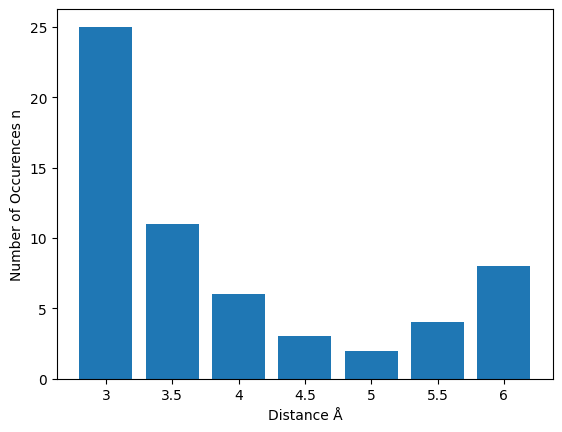

In [26]:
#Plot histogram
plt.bar(hist20.keys() , hist20.values())
plt.xlabel('Distance Å')
plt.ylabel('Number of Occurences n')
plt.show()

Plotting a continuous histogram

[{'Residue_20_dist': 2.6378226, 'Residue_20_angle': 114.52650305894625}, {'Residue_20_dist': 3.993022, 'Residue_20_angle': 98.20705815264925}, {'Residue_20_dist': 2.669699, 'Residue_20_angle': 41.80664094627574}, {'Residue_20_dist': 5.7919607, 'Residue_20_angle': 85.3123248702583}, {'Residue_20_dist': 5.600802, 'Residue_20_angle': 36.16460512366108}, {'Residue_20_dist': 5.068687, 'Residue_20_angle': 66.6577170781497}, {'Residue_20_dist': 4.7814927, 'Residue_20_angle': 109.97414271789214}, {'Residue_20_dist': 2.500416, 'Residue_20_angle': 21.48519146402099}, {'Residue_20_dist': 3.3537557, 'Residue_20_angle': 61.99009983366634}, {'Residue_20_dist': 3.3408463, 'Residue_20_angle': 76.67482988719895}, {'Residue_20_dist': 2.4887345, 'Residue_20_angle': 64.9180944974618}, {'Residue_20_dist': 3.0730393, 'Residue_20_angle': 68.05745406276205}, {'Residue_20_dist': 2.831323, 'Residue_20_angle': 81.74190927721682}, {'Residue_20_dist': 2.6852732, 'Residue_20_angle': 61.61233518814342}, {'Residue_20

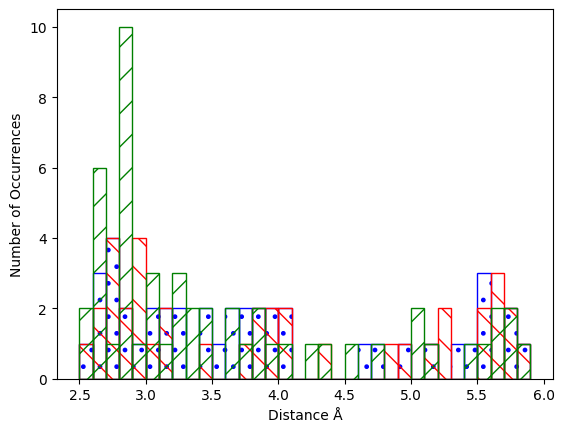

In [60]:
bin_edges = np.arange(2.5, 6.0, 0.1)
print(rows_Res20)
# Calculate histogram
hist_df1, _ = np.histogram(df1['Residue_20_dist'], bins=bin_edges)
hist_df2, _ = np.histogram(df2['Residue_20_dist'], bins=bin_edges)
hist_df3, _ = np.histogram(df3['Residue_20_dist'], bins=bin_edges)
# Plot histogram
plt.bar(bin_edges[:-1], hist_df1, width=0.1, align='edge', color='none', edgecolor='blue',hatch='.', label='MD Run 1')
plt.bar(bin_edges[:-1], hist_df2, width=0.1, align='edge', color='none', edgecolor='red', hatch='\\', label='MD Run 2')
plt.bar(bin_edges[:-1], hist_df3, width=0.1, align='edge', color='none', edgecolor='green',hatch='/', label='MD Run 3')
plt.xlabel('Distance Å')
plt.ylabel('Number of Occurrences')
plt.savefig('histogram.png', dpi=600)
plt.show()

In [12]:
df2.to_csv('test.csv')

In [10]:
print(output)

{1: [[29.882538, array([102.04981984])], [25.050241, array([122.03704396])], [10.321248, array([118.70100755])], [9.212422, array([169.73616508])]]}
